## <u>Vaccine Analysis</u>

### About the Data

<u>**Response Variables**</u>
* **h1n1_vaccine** - Whether respondent received H1N1 flu vaccine.
* **seasonal_vaccine** - Whether respondent received seasonal flu vaccine.  

Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both.

<u>**Explanatory Variables**</u>  

<u>Numericals:</u>

(For all binary variables: 0 = No; 1 = Yes.)  

* **h1n1_concern** - Level of concern about the H1N1 flu.
    * 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
* **h1n1_knowledge** - Level of knowledge about H1N1 flu.
    * 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
* **behavioral_antiviral_meds** - Has taken antiviral medications. (binary)
* **behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms. (binary)
* **behavioral_face_mask** - Has bought a face mask. (binary)
* **behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer. (binary)
* **behavioral_large_gatherings** - Has reduced time at large gatherings. (binary)
* **behavioral_outside_home** - Has reduced contact with people outside of own household. (binary)
* **behavioral_touch_face** - Has avoided touching eyes, nose, or mouth. (binary)
* **doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor. (binary)
* **doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor. (binary)
* **chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
* **child_under_6_months** - Has regular close contact with a child under the age of six months. (binary)
* **health_worker** - Is a healthcare worker. (binary)
* **health_insurance** - Has health insurance. (binary)
* **opinion_h1n1_vacc_effective** - Respondent's opinion about H1N1 vaccine effectiveness.
    * 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
* **opinion_h1n1_risk** - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
    * 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
* **opinion_h1n1_sick_from_vacc** - Respondent's worry of getting sick from taking H1N1 vaccine.
    * 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
* **opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.
    * 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
* **opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
    * 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
* **opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.
    * 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
* **household_adults** - Number of other adults in household, top-coded to 3.
* **household_children** - Number of children in household, top-coded to 3.

<u>Categoricals:</u>  

* **age_group** - Age group of respondent.
* **education** - Self-reported education level.
* **race** - Race of respondent.
* **sex** - Sex of respondent.
* **income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.
* **marital_status** - Marital status of respondent.
* **rent_or_own** - Housing situation of respondent.
* **employment_status** - Employment status of respondent.
* **hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
* **census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
* **employment_industry** - Type of industry respondent is employed in. Values are represented as short random character strings.
* **employment_occupation** - Type of occupation of respondent. Values are represented as short random character strings.




### Problem Statement

In contrast to COVID-19, this project evaluates the public health response to a H1N1 and seasonal flu vaccines.

* The goal of this classification project is to **predict whether people got H1N1 and seasonal flu vaccines** using information they shared about their backgrounds, opinions, and health behaviors.

The classification models that will be used for this project are: 
* Logistic Regression
* Naive Bayes
* K-Nearest Neighbors
* Decision Tree
* Random Forest
* Support Vector Machine (SVM)

### General Outline

* **Part 0**: Importing Libraries
* **Part 1**: Exploratory Data Analysis (EDA)
    * Before modeling, it is essential to explore the dataset by evaluating the distribution of the data, understanding relationships between quality vs. other explanatory variables, and addressing issues like collinearity.
* **Part 2**: Data Cleaning
    * The data cleaning process implies applying various techniques to address issues discovered during the exploration phase.
* **Part 3**: Classification Modeling
    * 1) Implement the first iteration of the given classification model
    * 2) Hypertune classification model
    * 3) Cross-validate
* **Part 4**: Report

### Part 0: Importing Libraries

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

### Part 1: Exploratory Data Analysis (EDA)

In [2]:
trainFeatures_df = pd.read_csv(r"datasets\training_set_features.csv")
trainFeatures_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
trainLabels_df = pd.read_csv(r"datasets\training_set_labels.csv")
trainLabels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


Since the data is split as features and labels it is important to combine it together with respect to the respondent_id

In [4]:
# combining the features and label set
vaccine_df = pd.merge(trainFeatures_df, trainLabels_df, on = "respondent_id")
vaccine_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [5]:
vaccine_df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [6]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

Based on the info summary,
* There are 26707 entries
* There should ideally be 26707 non-null entries in each feature/column
* Missing/null values exists
* Features are represented in numerical (i.e. int64 & float64) and categorical (object) terms
* Some numerical features have been encoded in binary terms
* Some numerical features have been label encoded over an integer range

Next, the dataset description describes employment_industry and employment_occupation are represented as randomized strings which is going to be dropped. Furthermore, a major point of interests in the dataset is the unreported disparity of health_insurance. Thus moving forward, the vaccine_df dataframe is going to be split into 4 different dataframes:
* vac_df_complete = all samples with insurance and no missing/null values
* vac_df_incomplete = all samples with insurance but has missing/null values  

* vac_df_noInsuranceComplete = all samples without insurance reported and no missing/null values
* vac_df_noInsuranceIncomplete = all samples without insurance reported but has missing/null values  

The main dataframes that will guide the classification predictive modeling are **vac_df_complete** and **vac_df_noInsuranceComplete**. On the other hand, **vac_df_incomplete** and **vac_df_noInsuranceIncomplete** will be used as an extension and apply some unsupervised modeling to fill in the missing/null values

In [7]:
vaccine_df.drop(['hhs_geo_region', 'employment_industry' , 'employment_occupation'], axis = 1, inplace = True)

In [8]:
vac_df_insurance = vaccine_df[(vaccine_df['health_insurance'] == 1) | (vaccine_df['health_insurance'] == 0)]
vac_df_complete = vac_df_insurance.dropna()
vac_df_incomplete = vac_df_insurance[vac_df_insurance.isnull().any(axis=1)]

In [9]:
print(f'Insurance reported: {len(vac_df_insurance)}')
print(f'Insurance reported complete: {len(vac_df_complete)}')
print(f'Insurance reported incomplete: {len(vac_df_incomplete)}')

Insurance reported: 14433
Insurance reported complete: 11794
Insurance reported incomplete: 2639


In [10]:
vac_df_noInsurance = vaccine_df[(vaccine_df['health_insurance'] != 1) & (vaccine_df['health_insurance'] != 0)]
vac_df_noInsurance.drop(['health_insurance'], axis = 1, inplace = True)
vac_df_noInsuranceComplete = vac_df_noInsurance.dropna()
vac_df_noInsuranceIncomplete = vac_df_noInsurance[vac_df_noInsurance.isnull().any(axis=1)]

In [11]:
print(f'Insurance not reported: {len(vac_df_noInsurance)}')
print(f'Insurance not reported complete: {len(vac_df_noInsuranceComplete)}')
print(f'Insurance not reported incomplete: {len(vac_df_noInsuranceIncomplete)}')

Insurance not reported: 12274
Insurance not reported complete: 7848
Insurance not reported incomplete: 4426


It is clear that after splitting the vaccine_df into 4 different dataframes it is likely that there are going to be 3 different models to be made to account for different situations:
 * If the new unforseen sample reports every single field then apply the best vac_df_complete model
 * If the new unforseen sample reports every single field except insurance then apply the best vac_df_noInsuranceComplete model
 * If the new unforseen sample has more than one missing/null value reported then apply a general model

In [12]:
numericals = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
              'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
              'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1',
              'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker',
              'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
              'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
              'household_children']

numericalsFirstHalf = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
              'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
              'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1',
              'doctor_recc_seasonal','h1n1_vaccine', 'seasonal_vaccine']

numericalsLastHalf = ['chronic_med_condition', 'child_under_6_months', 'health_worker',
              'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
              'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
              'household_children', 'h1n1_vaccine', 'seasonal_vaccine']

categoricals = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status',
                'rent_or_own', 'employment_status', 'census_msa']

In [13]:
for i in range (len(categoricals)):
    print(f'{categoricals[i]}: {vac_df_complete[categoricals[i]].unique()}')

age_group: ['55 - 64 Years' '35 - 44 Years' '45 - 54 Years' '65+ Years'
 '18 - 34 Years']
education: ['< 12 Years' '12 Years' 'Some College' 'College Graduate']
race: ['White' 'Black' 'Hispanic' 'Other or Multiple']
sex: ['Female' 'Male']
income_poverty: ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
marital_status: ['Not Married' 'Married']
rent_or_own: ['Own' 'Rent']
employment_status: ['Not in Labor Force' 'Employed' 'Unemployed']
census_msa: ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [14]:
for i in range (len(categoricals)):
    print(f'{categoricals[i]}: {vac_df_noInsuranceComplete[categoricals[i]].unique()}')

age_group: ['65+ Years' '45 - 54 Years' '55 - 64 Years' '35 - 44 Years'
 '18 - 34 Years']
education: ['12 Years' 'Some College' '< 12 Years' 'College Graduate']
race: ['White' 'Black' 'Other or Multiple' 'Hispanic']
sex: ['Female' 'Male']
income_poverty: ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
marital_status: ['Not Married' 'Married']
rent_or_own: ['Rent' 'Own']
employment_status: ['Not in Labor Force' 'Employed' 'Unemployed']
census_msa: ['MSA, Principle City' 'MSA, Not Principle  City' 'Non-MSA']


#### Visual Analysis (Numerical)

The visual analysis is based on the entire dataframe before the data cleaning transformation

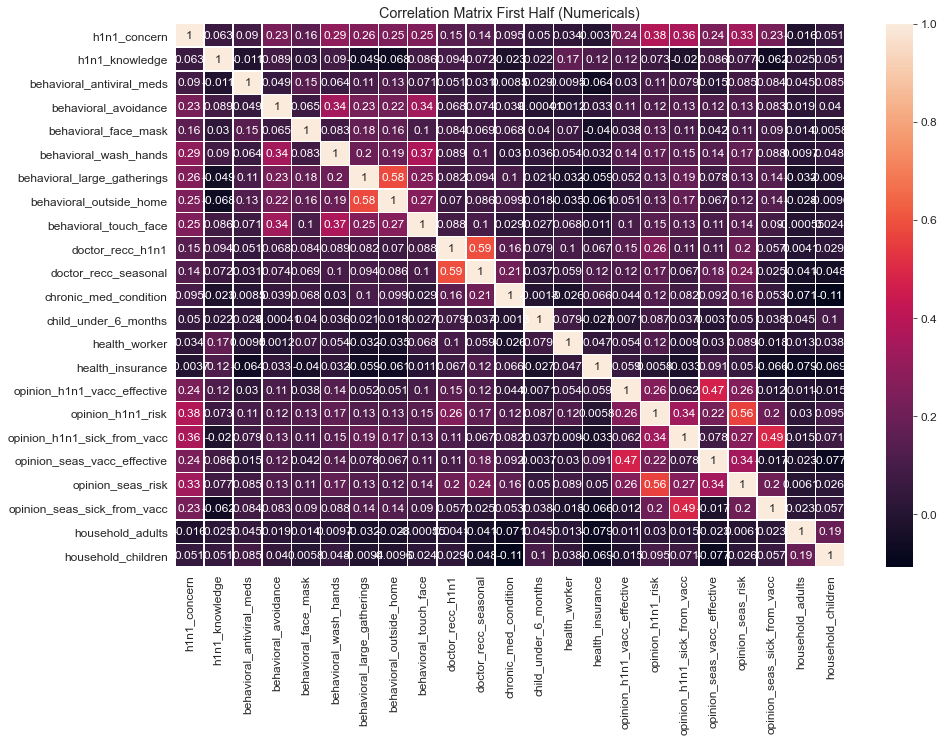

In [15]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(vaccine_df[numericals].corr(), linewidths=.5, annot=True)
plt.title('Correlation Matrix First Half (Numericals)')
plt.show()

It is clear that based on the heatmap, there doesn't seem to be major collinearity issues

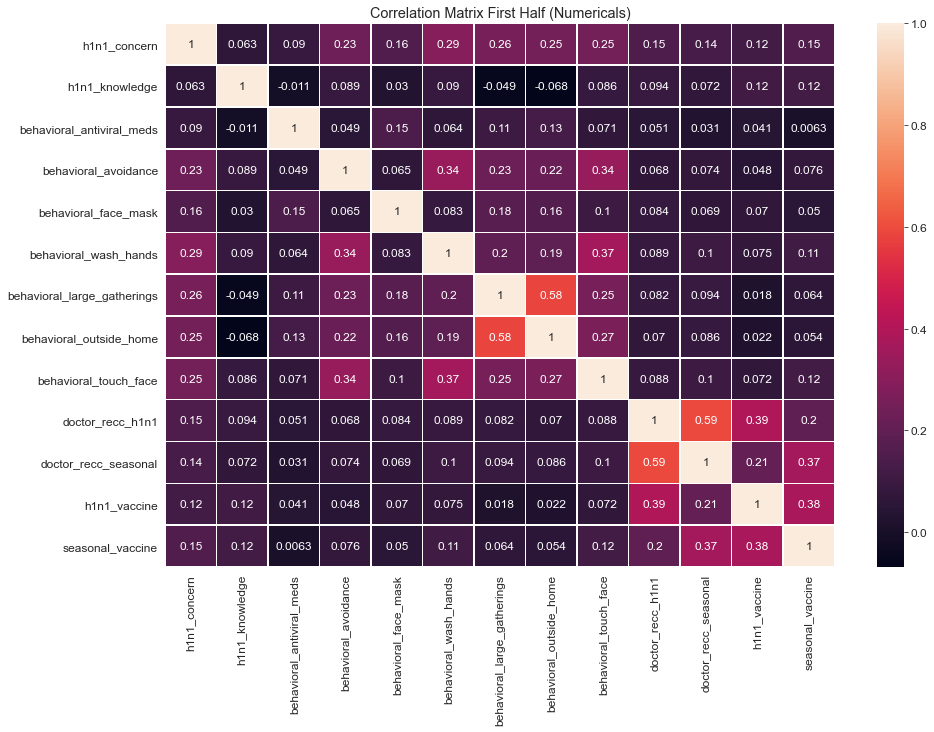

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(vaccine_df[numericalsFirstHalf].corr(), linewidths=.5, annot=True)
plt.title('Correlation Matrix First Half (Numericals)')
plt.show()

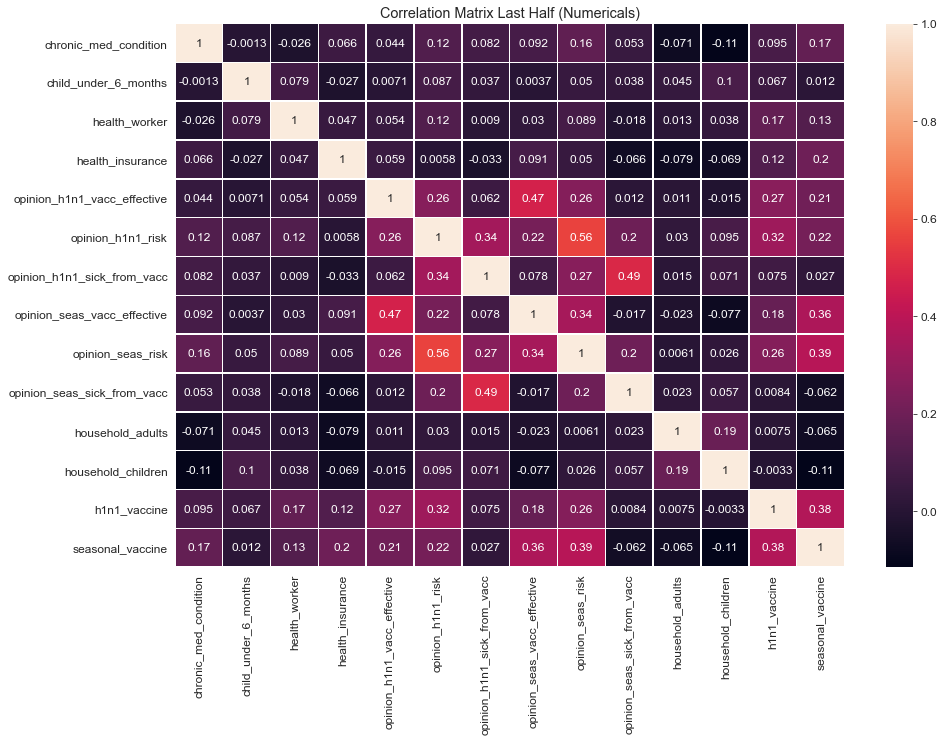

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(vaccine_df[numericalsLastHalf].corr(), linewidths=.5, annot=True)
plt.title('Correlation Matrix Last Half (Numericals)')
plt.show()

#### Heatmap Evaluation

**h1n1_vaccine**
* positive correlation (>.30 correlation coefficient)
    * doctor_recc_h1n1
    * seasonal_vaccine
    * opinion_h1n1_risk
* negative correlation
    * Based on the heatmap there doesn't seem to be any negative correlated values

**seasonal_vaccine** 
* positive correlation (>.30 correlation coefficient)
    * doctor_recc_h1n1
    * h1n1_vaccine
    * opinion_seas_vacc_effective
    * opinion_seas_risk
* negative correlation
    * household_children

It may be the case that heatmap correlation coefficient values may be unreliable because the response variables h1n1_vaccine and seasonal_vaccine are both represented in binary terms. Furthermore, most of the explantatory variables are represented in terms of whole integer value ranges as described by the dataset characteristics. 

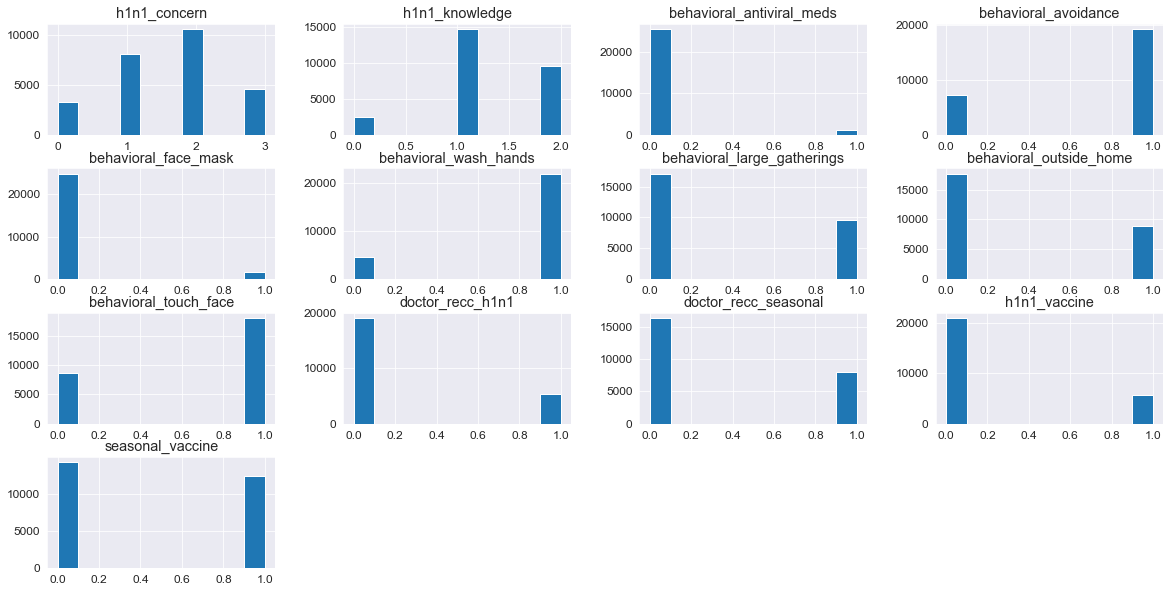

In [18]:
vaccine_df[numericalsFirstHalf].hist(figsize = (20,10))
plt.show()

* It would be interesting to analyze the measure of knowledge for people that participated in this sample and how it impacted their answer on the h1n1_concern
* An important thing to note especially if there is some sort of virus that is publicly announced is the ideal behavior
    * take antiviral meds - dataset leaned towards no
    * behavioral avoidance - closed contact with people with flu good
    * behavioral mask - no face mask????
    * behavioral wash hands - did wash hands
    * large gatherings - more than half still gathered
    * outside home - more than half still met up with people
    * touch face - did reduce face touching   
    
* It is really interesting to see that despite somewhat equal ratio of doctor reccomendation of h1n1 and seasonal. Many more people decided that seasonal_vaccine should be gotten. An argument can be made that because there isn't that many doctors that recommended the vaccine it may be possible that the safety measure regarding gatherings isn't taken to seriously

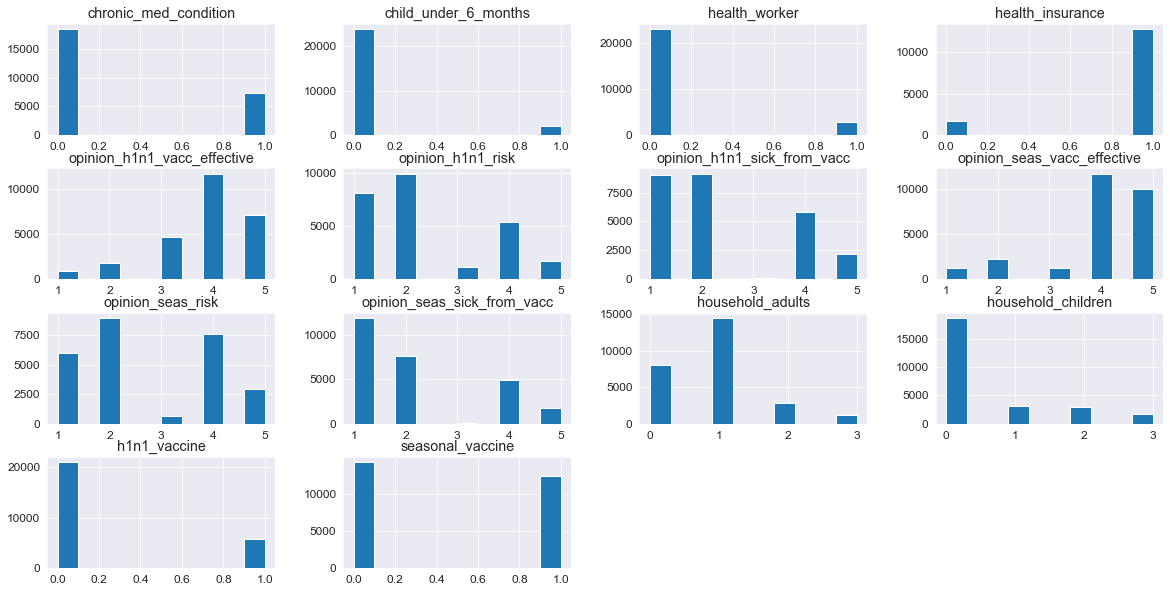

In [19]:
vaccine_df[numericalsLastHalf].hist(figsize = (20,10))
plt.show()

#### Histogram Evaluation

* It would be interesting to explore the relationship between people with chronic_med_condition and where they lie on the safe*  practices listed above. It is likely that they contribute
* It would be interesting to see people who have close contact to children and where they lie on the vaccination. Argument can be made that babies and chronic_med_condition are people are somewhat immunocompromised
* There is a lack of health_worker in this dataset. Important to explore where they lie
* Many people have insurance
* People reported that H1N1 vaccine is effective but the risk is low
* H1N1 sick from vac is low
* seasonal vac is effictive, but risk for getting sick without vacc is somewhat equal, and seasonal sick from vac is low. 
* most of the people that reported in this dataset mostly adult household with little to no children.
* There is a clear disparity of people that did not get the h1n1_vaccine, but there is somewhat an equal distribution in seasonal_vaccine. 
    * An argument can be made that seasonal_vaccine is more familiar compared to h1n1_vaccine. 
* Things to consider/ explore --> how were these questions worded, the type of media coverage back then, and possibly the fact that political polarization was not as prominent, as well as cross-reference with the true sample size, was there a face of h1n1 that was guiding the public on the best practices? Techinically not even sure if there were conspiracy regarding how H1N1 developed naturally or in some sort of synthetic lab. 

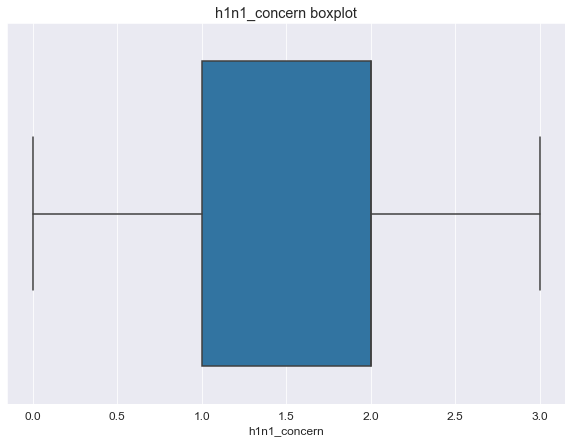

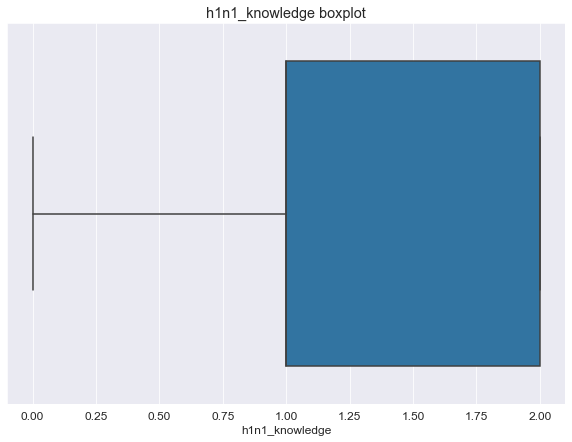

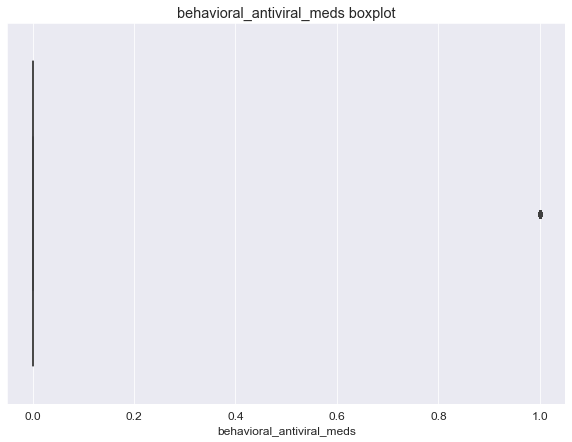

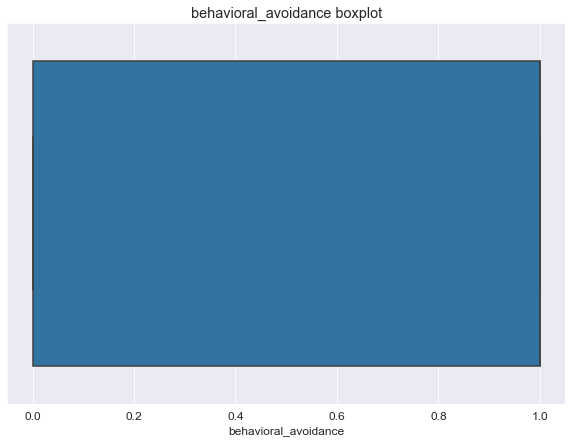

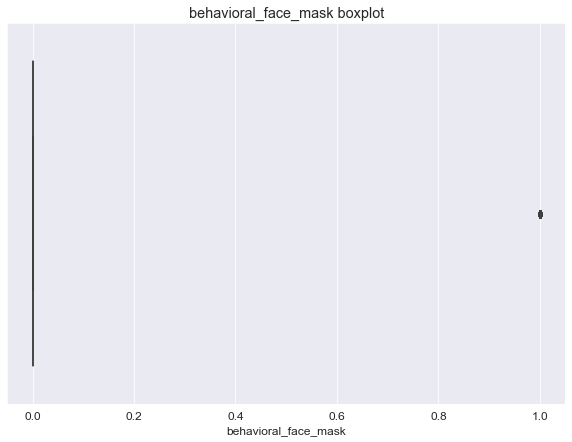

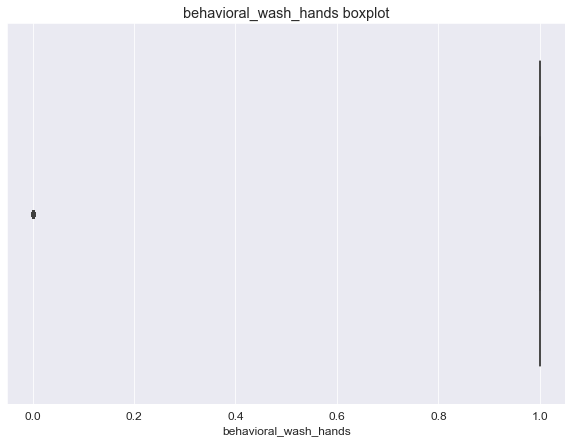

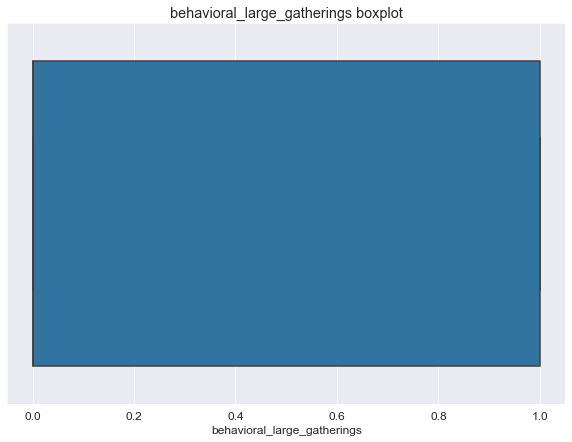

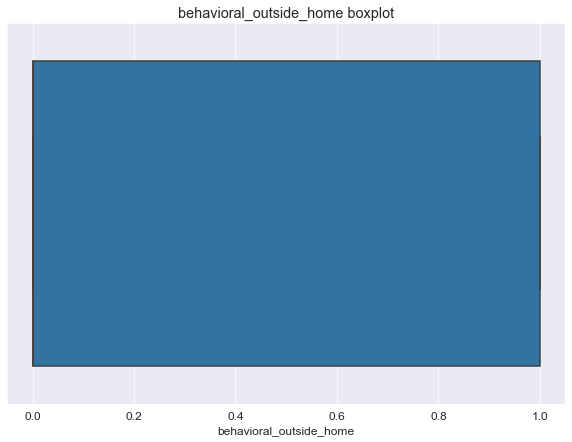

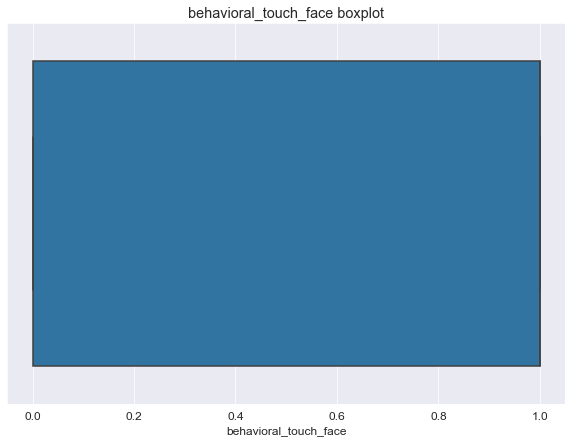

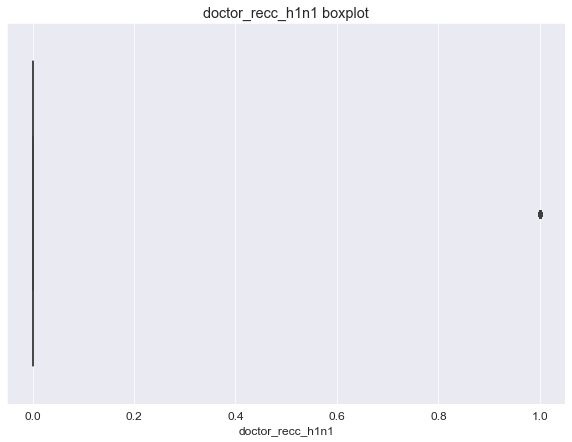

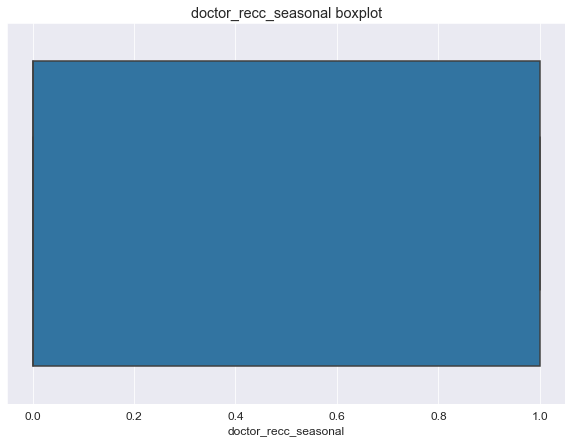

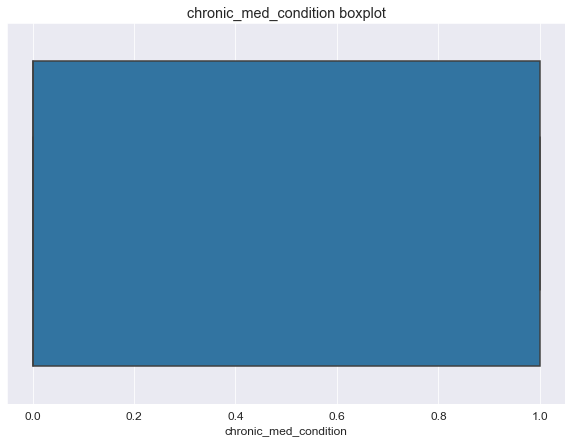

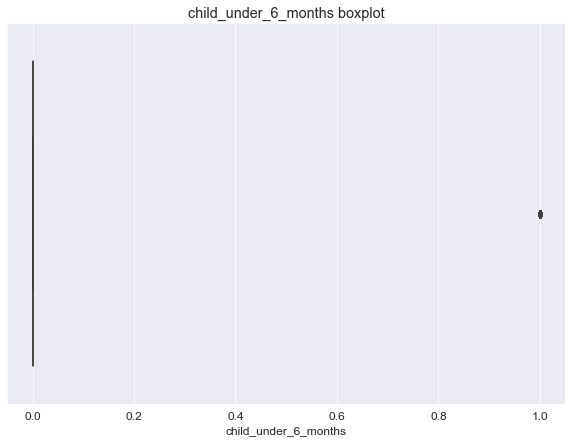

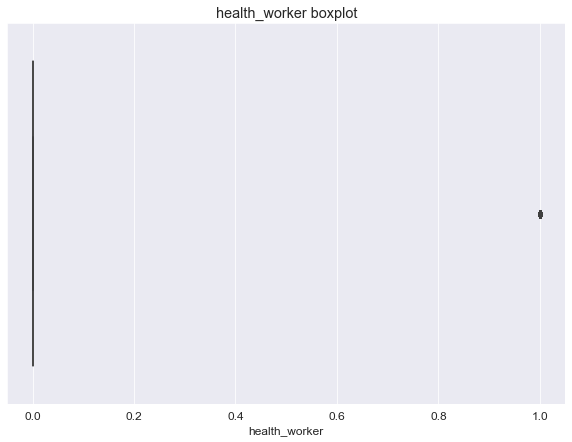

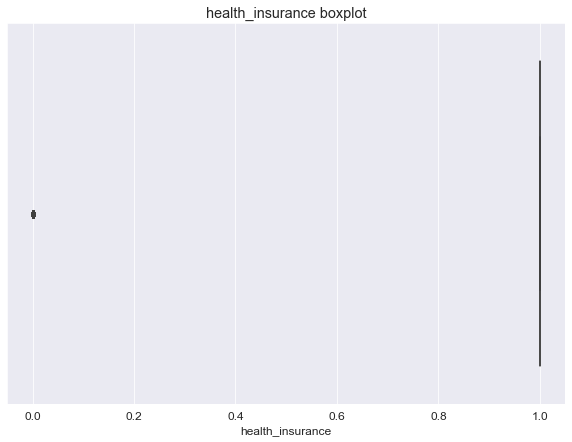

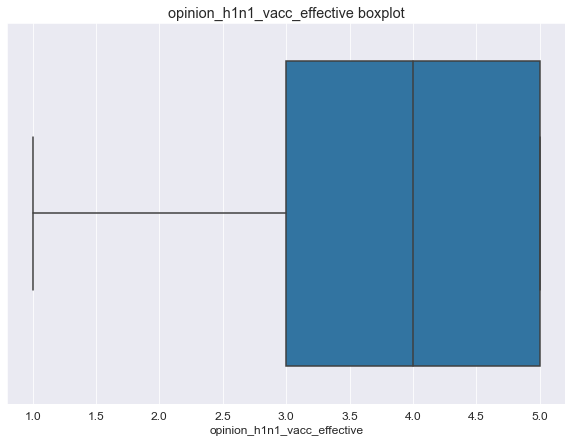

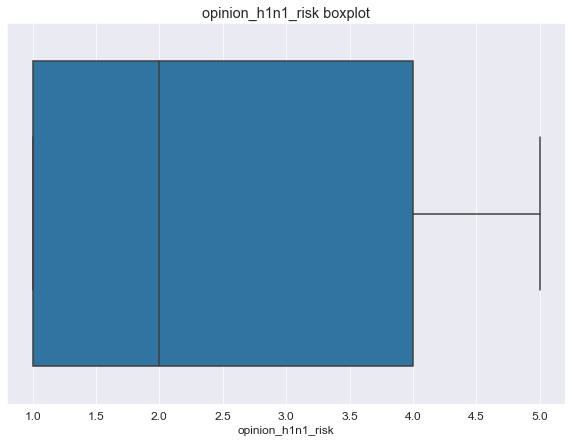

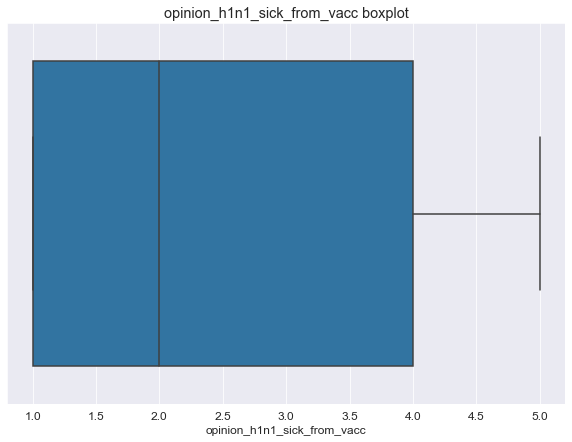

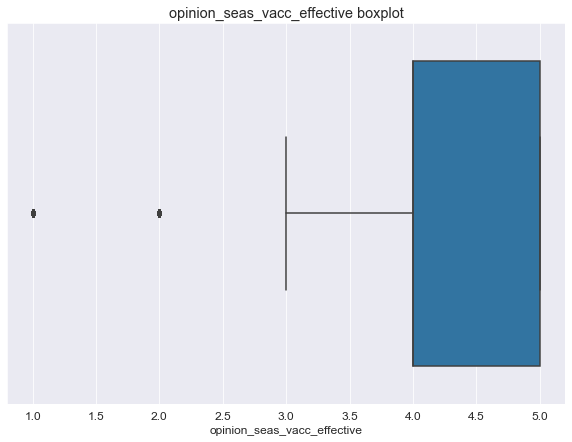

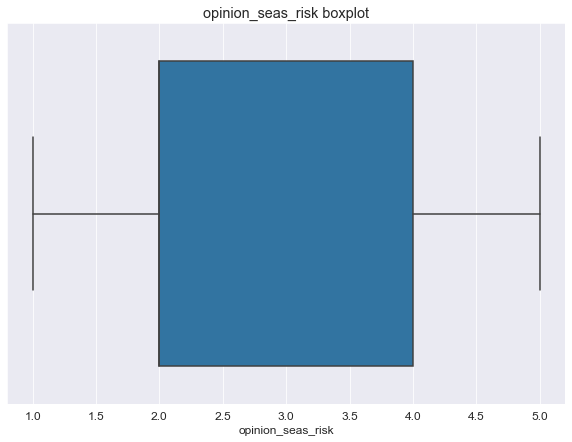

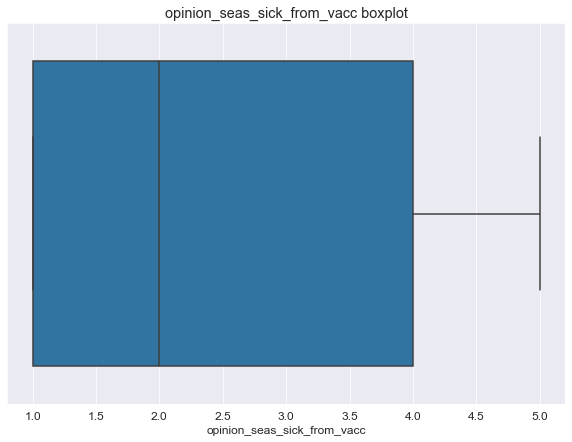

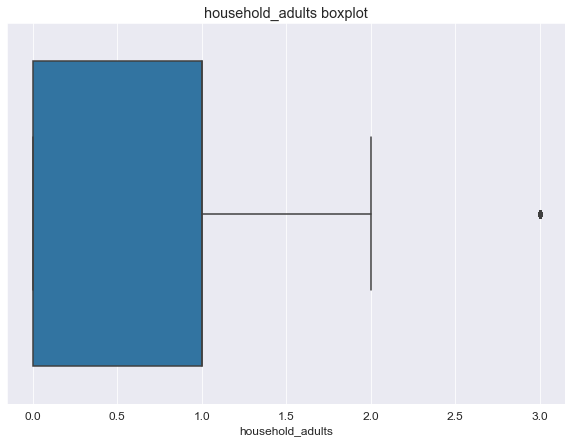

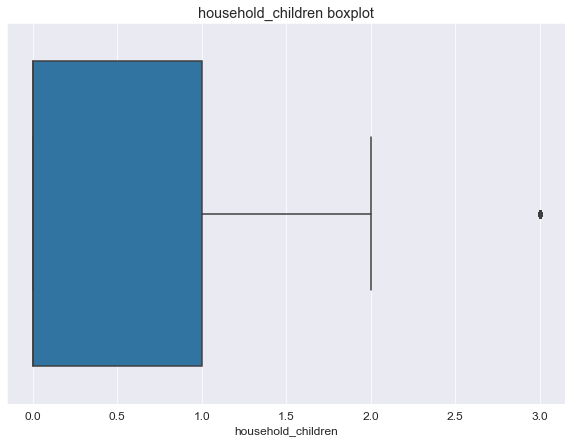

In [20]:
for i, explanatoryVariables in enumerate(numericals, 1):
    sns.boxplot(x = explanatoryVariables, data = vaccine_df).set(title=f'{explanatoryVariables} boxplot')
    plt.show()

#### Boxplot Evaluation

It may be the case the boxplots doesn't seem to be informative compared to the histogram, however samples are treated as outliers because of the large disparity like. People who are health workers are outliers. It is possible to explore that during the data cleaning phase it may be beneficial to breakdown the sample even more. 
 * For example if all health workers believe that h1n1 and seasonal is vaccine required and follow the best practices then remove completely. In this case, an arugment can be made that they are more well informed. 

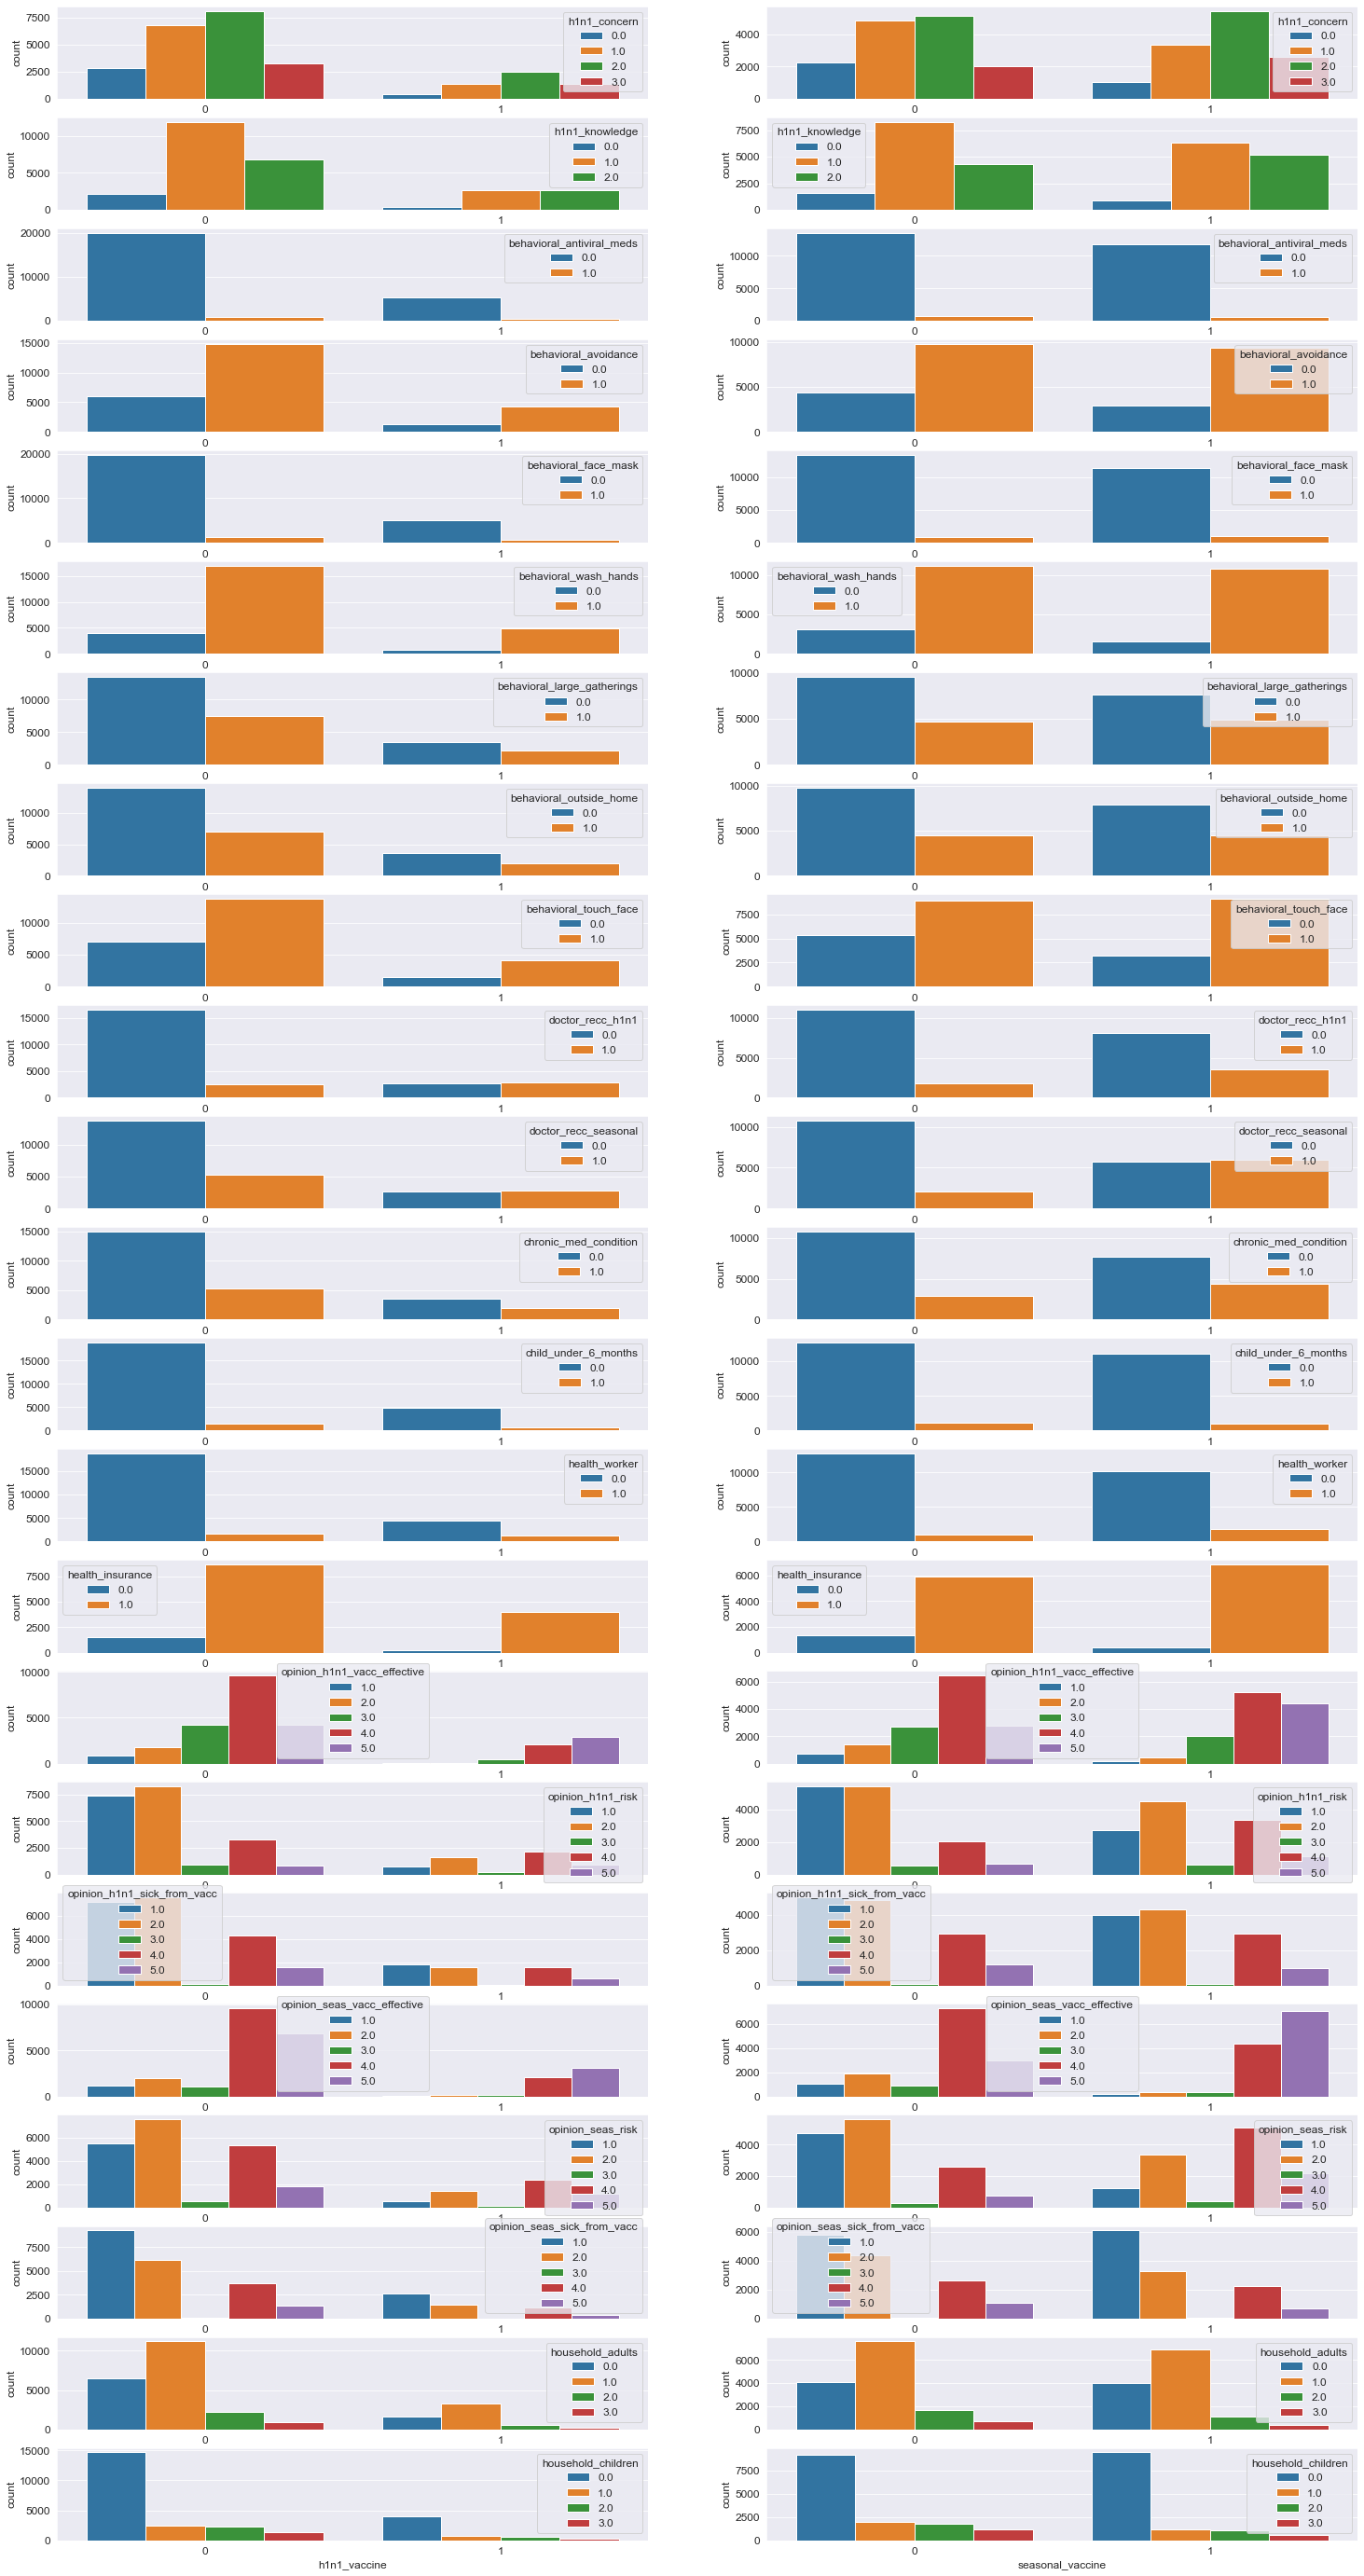

In [55]:
fig, ax = plt.subplots(23,2, figsize=(25, 50))

for i, explanatoryVariables in enumerate(vaccine_df[numericals], 1):
    sns.countplot(x = vaccine_df['h1n1_vaccine'], hue = explanatoryVariables, data = vaccine_df[numericals], ax = ax[i-1,0])
    sns.countplot(x = vaccine_df['seasonal_vaccine'], hue = explanatoryVariables, data = vaccine_df[numericals], ax=ax[i-1,1])

In [56]:
# This still needs more refinment possibly only choose the features that are the most important

In [22]:
# bar plot w/ hue would need to be based on the more refined findings from the histogram. 

pairplots (not appropriate because most is binary), scatterplot (not ideal), density plot (binary value not over a range). These visualization would be redundant. 

#### Visual Analysis (Categorical)

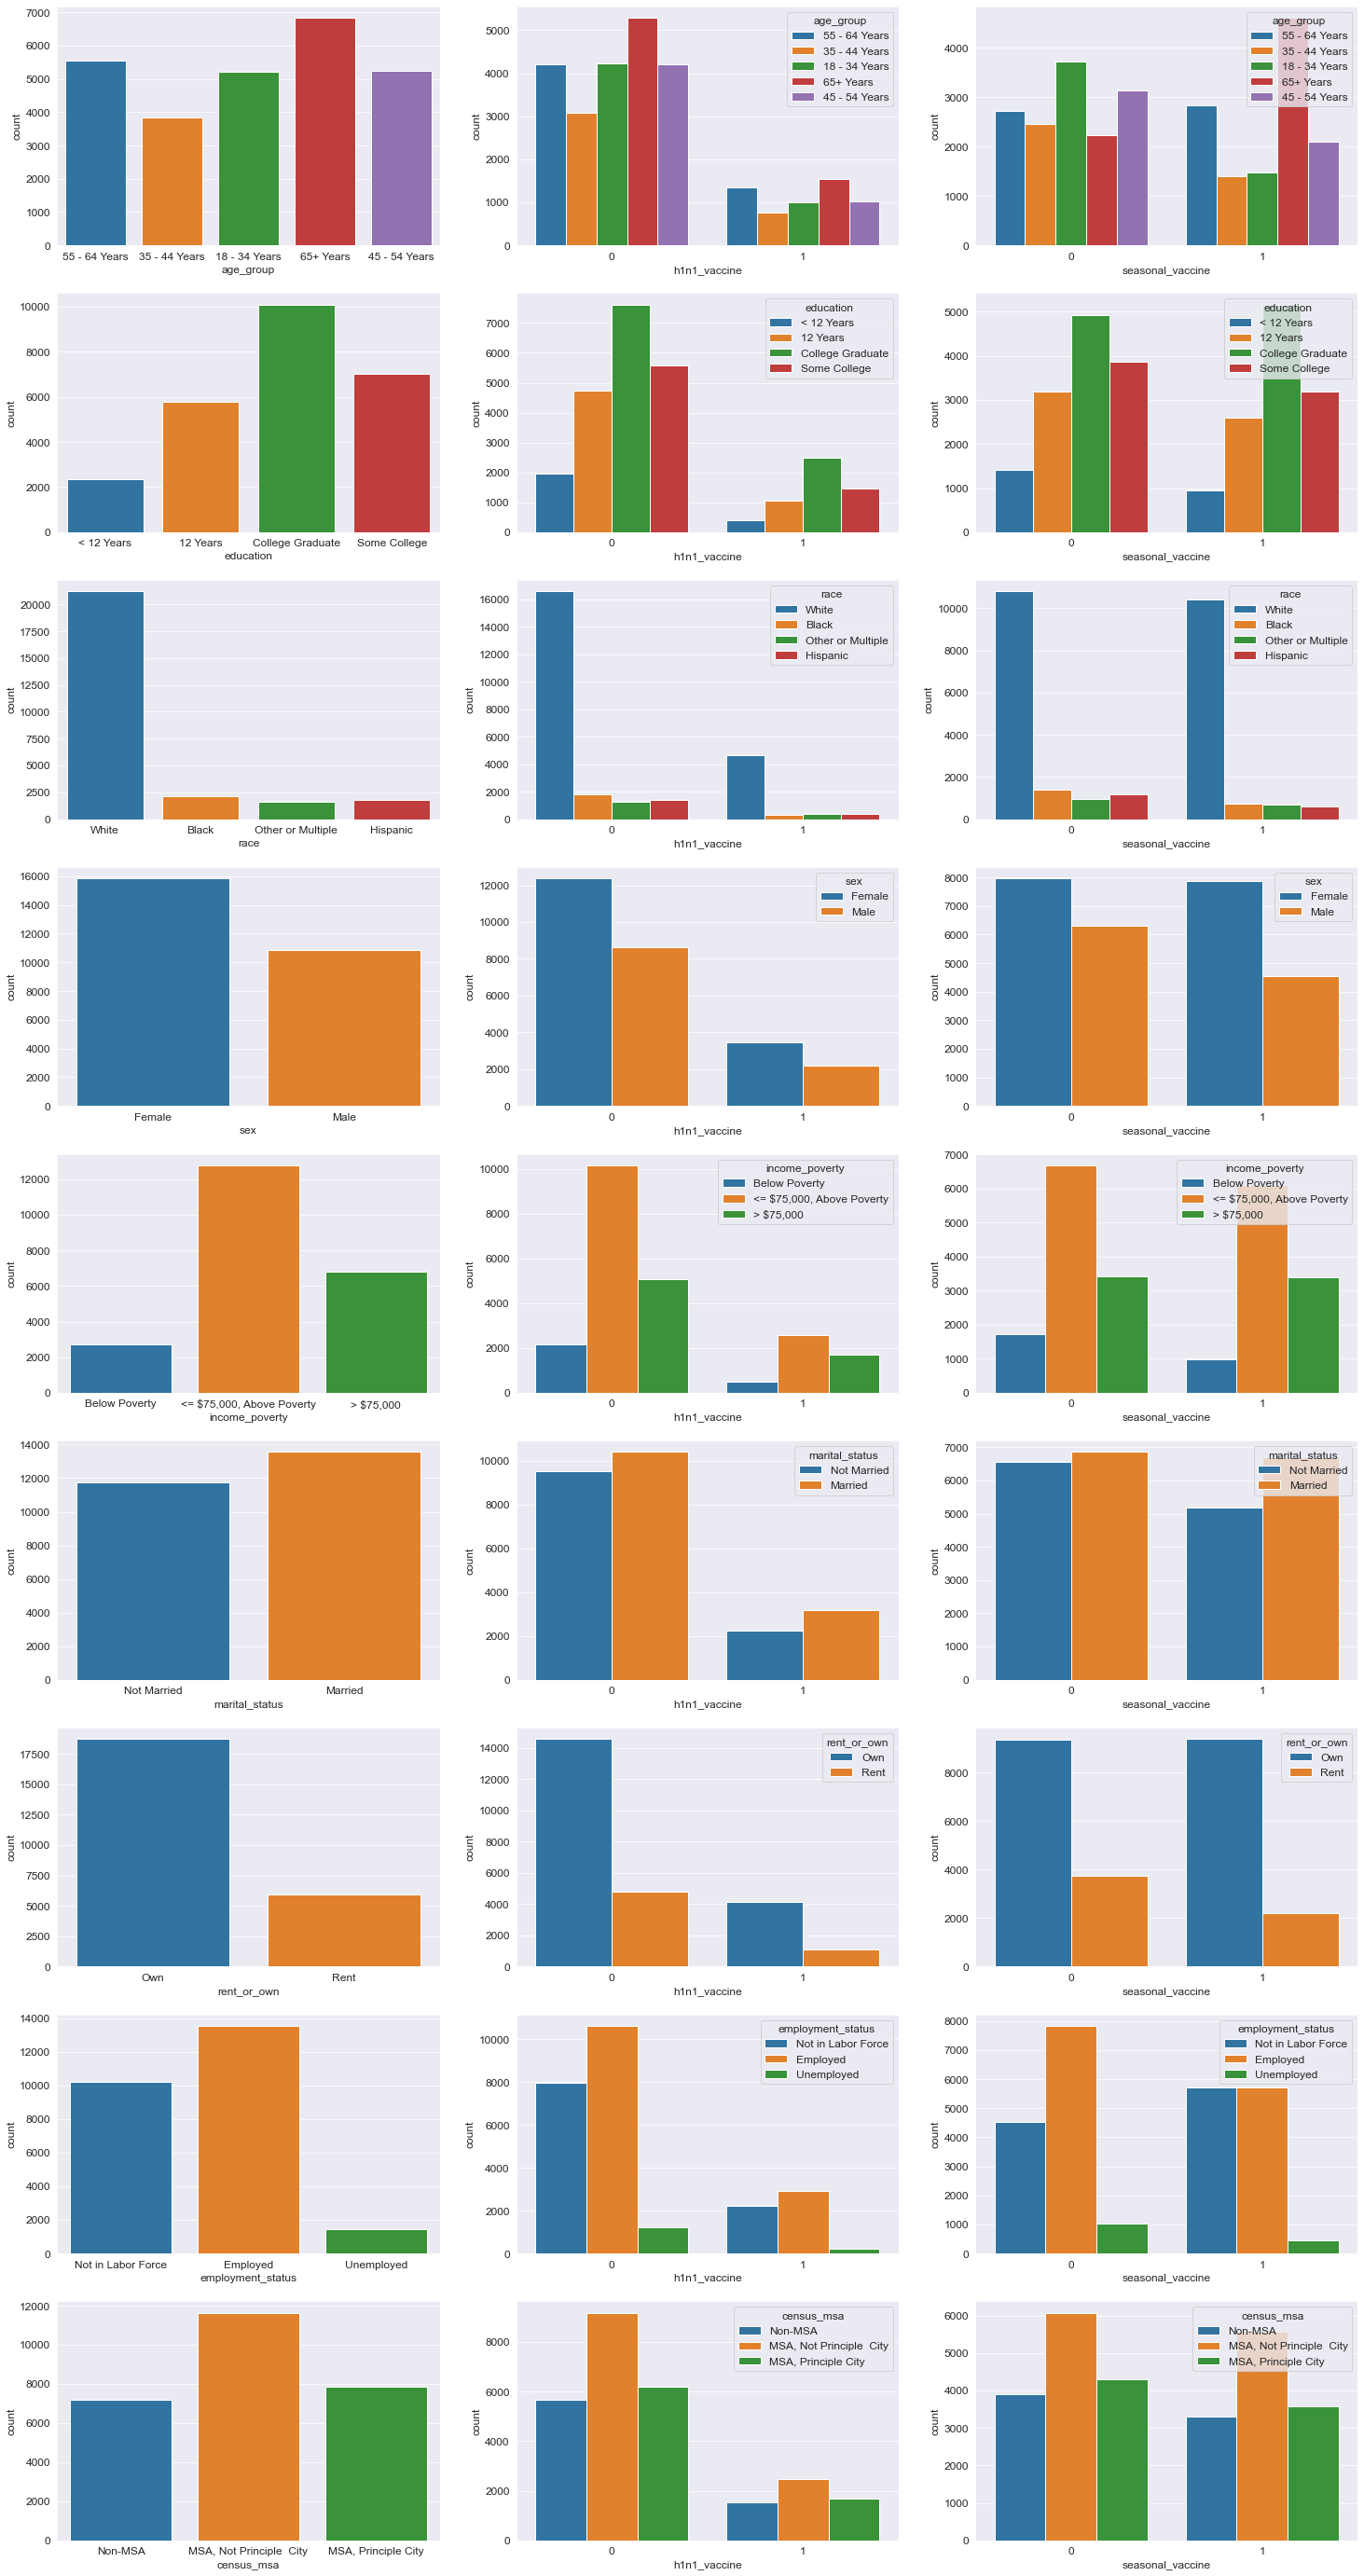

In [46]:
fig, ax = plt.subplots(9,3, figsize=(25, 50))

for i, explanatoryVariables in enumerate(vaccine_df[categoricals], 1):
    sns.countplot(x = explanatoryVariables, data = vaccine_df[categoricals], ax = ax[i-1,0])
    sns.countplot(x = vaccine_df['h1n1_vaccine'], hue = explanatoryVariables, data = vaccine_df[categoricals], ax=ax[i-1,1])
    sns.countplot(x = vaccine_df['seasonal_vaccine'], hue = explanatoryVariables, data = vaccine_df[categoricals], ax=ax[i-1,2])

In [23]:
#violinplots, pie chart, stacked bar chart, heatmap
# in order to do so might need to transform it already either by label encoding or hot encoding

In [ ]:
# a combination of numerical and categorical analysis

In [24]:
# Initial Assumptions after EDA

### Part 2: Data Cleaning

In [25]:
# drop repeats, replace null values, label encode and hot encode

### Part 3: Classification Modeling

### Part 4: Report

In [26]:
# incorporate the questions from the classifications HW